In [2]:
import os
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import torch
from sklearn.metrics import r2_score

c:\Users\diede\miniconda3\envs\windfarm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def f_filter_arr(filtered_array, checked_array, minimum_value, maximum_value):
    # Create an empty list
    filter_arr = []

    # Go through each element in the array to be checked
    for element in checked_array:
        if (element >= minimum_value and element < maximum_value):
            filter_arr.append(True)
        else:
            filter_arr.append(False)

    return filtered_array[filter_arr]

In [22]:
'''
Adjust all desired settings here, everything should be linked and automatic from there on. 
C:\Studies\WFLO-GNN\documents\data\data_single_pmf_wd\results_mse_loss\2_no_reduction-random_filter-0.8-layer_8_64-batchn_False-act_lrelu-actf_False-lbias_True
data_path = os.path.join(data_path, 'data_multi_wd', 'results_incl_pmf_wind')
'''
# Import testing and plotting functions
from plot_result_functions import ResultSupportFunctions as support_f
# Set paths and options for experiment specific data
doc_path = r'C:\Studies\WFLO-GNN\documents'
# Load data path
'''
data_single_pmf_wd
results_mse_loss, results_detailed_time

data_multi_wd
results_incl_pmf_wind, results_incl_pdf_wind, results_excl_wind, results_detailed_time
'''
singleWD = True
if (singleWD):
    data_path = os.path.join(doc_path, 'data', 'data_single_pmf_wd')
else:
    data_path = os.path.join(doc_path, 'data', 'data_multi_wd')
data_path_1 = os.path.join(data_path, 'results_mse_loss')
data_path_2 = os.path.join(data_path, 'results_mse_loss')
#data_path_3 = os.path.join(data_path, 'results_detailed_time')
if (singleWD):
    pwlymax = 0.9
else:
    pwlymax = 0.3

print(len(os.listdir(data_path_1)), os.listdir(data_path_1))
print(len(os.listdir(data_path_2)), os.listdir(data_path_2))

9 ['0_no_reduction-cartesian_filter-1.3-layer_8_64-batchn_True-act_relu-actf_False-lbias_True', '0_no_reduction-pwl_filter-0.001-layer_8_64-batchn_True-act_relu-actf_False-lbias_True', '0_no_reduction-random_filter-0.8-layer_8_64-batchn_True-act_relu-actf_False-lbias_True', '1_no_reduction-cartesian_filter-1.3-layer_8_64-batchn_False-act_relu-actf_False-lbias_True', '1_no_reduction-pwl_filter-0.001-layer_8_64-batchn_False-act_relu-actf_False-lbias_True', '1_no_reduction-random_filter-0.8-layer_8_64-batchn_False-act_relu-actf_False-lbias_True', '2_no_reduction-cartesian_filter-1.3-layer_8_64-batchn_False-act_lrelu-actf_False-lbias_True', '2_no_reduction-pwl_filter-0.001-layer_8_64-batchn_False-act_lrelu-actf_False-lbias_True', '2_no_reduction-random_filter-0.8-layer_8_64-batchn_False-act_lrelu-actf_False-lbias_True']
9 ['0_no_reduction-cartesian_filter-1.3-layer_8_64-batchn_True-act_relu-actf_False-lbias_True', '0_no_reduction-pwl_filter-0.001-layer_8_64-batchn_True-act_relu-actf_False-

In [5]:
figures_path = r'C:\Studies\WFLO-GNN\results\Model_VFinal'

model1 = 'MD-E-C'
print(model1)
i = 0
results_path_1 = os.path.join(data_path_1, os.listdir(data_path_1)[i])
figures_path_1 = os.path.join(figures_path, model1, 'test')

model2 = 'MD-E-R'
print(model2)
j = 2
results_path_2 = os.path.join(data_path_2, os.listdir(data_path_2)[j])
figures_path_2 = os.path.join(figures_path, model2, 'test')


try:
    os.makedirs(figures_path_1)
except:
    print('Folder already exist.')
try:
    os.makedirs(figures_path_2)
except:
    print('Folder already exist.')

MD-E-C
MD-E-R
Folder already exist.
Folder already exist.


In [6]:
model = torch.load(os.path.join(results_path_2, 'model'))
model

MLP_main(ModuleList(
  (0): Linear(2, 64, bias=True)
  (1): Identity()
  (2): LeakyReLU(negative_slope=0.01)
  (3): Linear(64, 64, bias=True)
  (4): Identity()
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(64, 64, bias=True)
  (7): Identity()
  (8): LeakyReLU(negative_slope=0.01)
  (9): Linear(64, 64, bias=True)
  (10): Identity()
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(64, 64, bias=True)
  (13): Identity()
  (14): LeakyReLU(negative_slope=0.01)
  (15): Linear(64, 64, bias=True)
  (16): Identity()
  (17): LeakyReLU(negative_slope=0.01)
  (18): Linear(64, 64, bias=True)
  (19): Identity()
  (20): LeakyReLU(negative_slope=0.01)
  (21): Linear(64, 64, bias=True)
  (22): Identity()
  (23): LeakyReLU(negative_slope=0.01)
  (24): Linear(64, 64, bias=True)
  (25): Identity()
  (26): LeakyReLU(negative_slope=0.01)
  (27): Linear(64, 1, bias=True)
))

In [7]:
losses_epochs_1 = np.loadtxt(os.path.join(results_path_1, 'Losses_epochs.txt'))
losses_epochs_2 = np.loadtxt(os.path.join(results_path_2, 'Losses_epochs.txt'))
msemax = np.max((losses_epochs_1, losses_epochs_2))
test_loss_detailed_1 = xr.open_dataarray(os.path.join(results_path_1, 'test_loss_detailed_all.nc'))
test_loss_detailed_2 = xr.open_dataarray(os.path.join(results_path_2, 'test_loss_detailed_all.nc'))
aemax = np.max((test_loss_detailed_1.sel(edge_feature='loss_mae', epoch=199).max().item(), test_loss_detailed_2.sel(edge_feature='loss_mae', epoch=199).max().item()))

MD-E-C
C: 0.0004534164874712587
MD-E-R
R: 0.00011591093639253813


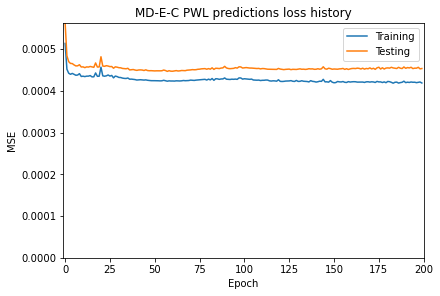

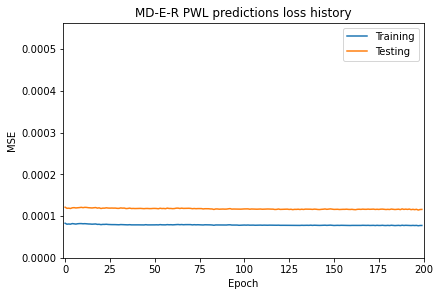

In [8]:
save_file = False
print(model1)
losses_epochs_1 = np.loadtxt(os.path.join(results_path_1, 'Losses_epochs.txt'))
train_losses_epochs = losses_epochs_1[0]
test_losses_epochs = losses_epochs_1[1]
print(f'C: {test_losses_epochs[199]}')
plt.figure(layout='constrained')
plt.plot(train_losses_epochs, label='Training')
plt.plot(test_losses_epochs, label='Testing')
plt.xlabel('Epoch')
plt.axis([-1, 200, 0, msemax])
plt.ylabel('MSE')
title = f'{model1} PWL predictions loss history'
plt.title(title)
plt.legend();
if (save_file):
    plt.savefig(os.path.join(figures_path_1, f'MSE.pdf'), format='pdf')
    #plt.savefig(os.path.join(figures_path_1, f'{title}.png'), format='png')

print(model2)
losses_epochs_2 = np.loadtxt(os.path.join(results_path_2, 'Losses_epochs.txt'))
train_losses_epochs = losses_epochs_2[0]
test_losses_epochs = losses_epochs_2[1]
print(f'R: {test_losses_epochs[199]}')
plt.figure(layout='constrained')
plt.plot(train_losses_epochs, label='Training')
plt.plot(test_losses_epochs, label='Testing')
plt.xlabel('Epoch')
plt.axis([-1, 200, 0, msemax])
plt.ylabel('MSE')
title = f'{model2} PWL predictions loss history'
plt.title(title)
plt.legend();
if (save_file):
    plt.savefig(os.path.join(figures_path_2, f'MSE.pdf'), format='pdf')
    #plt.savefig(os.path.join(figures_path_2, f'{title}.png'), format='png')

In [9]:

'''
save_file = False
save_dir = figures_path_1
# Build the plot
plt.figure(layout='constrained')

#test_times = np.loadtxt(os.path.join(no_results_path, 'Testing_times.txt'))
#plt.hist(test_times, bins=100, weights=np.ones(len(test_times)) / len(test_times), label='No filter')
#print(test_times.sum())

test_times = np.loadtxt(os.path.join(results_path_2, 'Testing_times.txt'))
plt.hist(test_times, label='No filter', bins=100)
print(test_times.sum())

test_times = np.loadtxt(os.path.join(results_path_2, 'Testing_times.txt'))
plt.hist(test_times, bins=100, label='Random filter')
print(test_times.sum())

test_times = np.loadtxt(os.path.join(results_path_1, 'Testing_times.txt'))
plt.hist(test_times, bins=100, label='Cartesian filter')
print(test_times.sum())

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Elapsed testing time per batch')

#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.legend()
if (save_file):
    plt.savefig(os.path.join(save_dir, 'results_time_C.pdf'), format='pdf')
plt.show()
'''

"\nsave_file = False\nsave_dir = figures_path_1\n# Build the plot\nplt.figure(layout='constrained')\n\n#test_times = np.loadtxt(os.path.join(no_results_path, 'Testing_times.txt'))\n#plt.hist(test_times, bins=100, weights=np.ones(len(test_times)) / len(test_times), label='No filter')\n#print(test_times.sum())\n\ntest_times = np.loadtxt(os.path.join(results_path_2, 'Testing_times.txt'))\nplt.hist(test_times, label='No filter', bins=100)\nprint(test_times.sum())\n\ntest_times = np.loadtxt(os.path.join(results_path_2, 'Testing_times.txt'))\nplt.hist(test_times, bins=100, label='Random filter')\nprint(test_times.sum())\n\ntest_times = np.loadtxt(os.path.join(results_path_1, 'Testing_times.txt'))\nplt.hist(test_times, bins=100, label='Cartesian filter')\nprint(test_times.sum())\n\nplt.xlabel('Time')\nplt.ylabel('Frequency')\nplt.title('Elapsed testing time per batch')\n\n#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))\nplt.legend()\nif (save_file):\n    plt.savefig(os.path.join(sav

MD-E-C


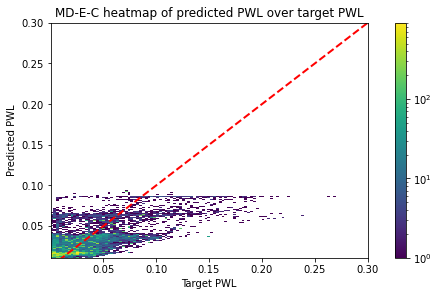

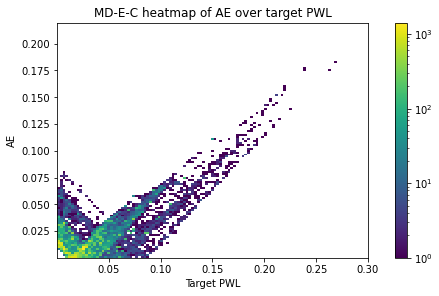

In [10]:
save_file = False
cmap = 'viridis'
bins = 100

print(model1)
test_loss_detailed_1 = xr.open_dataarray(os.path.join(results_path_1, 'test_loss_detailed_all.nc'))
x_var = 'pwl_y'
y_var = 'pwl_pred'
y_data = test_loss_detailed_1.sel(edge_feature=y_var, epoch=199).values.flatten()
y_data = y_data[~np.isnan(y_data)]
x_data = test_loss_detailed_1.sel(edge_feature=x_var, epoch=199).values.flatten()
x_data = x_data[~np.isnan(x_data)]

plt.figure(layout='constrained')
plt.hist2d(x_data, y_data, norm=mpl.colors.LogNorm(), bins=bins, cmap=plt.get_cmap(cmap))
plt.plot([0, 1], [0, 1], '--', lw=2, c='r')
plt.axis([None, pwlymax, None, pwlymax])
plt.xlabel('Target PWL')
plt.ylabel('Predicted PWL')
plt.colorbar()
title = f'{model1} heatmap of predicted PWL over target PWL'
plt.title(title)
if (save_file):
    plt.savefig(os.path.join(figures_path_1, f'HM-PWLP.pdf'), format='pdf')
    #plt.savefig(os.path.join(figures_path_1, f'{title}.png'), format='png')
# ================================
x_var = 'pwl_y'
y_var = 'loss_mae'
y_data = test_loss_detailed_1.sel(edge_feature=y_var, epoch=199).values.flatten()
y_data = y_data[~np.isnan(y_data)]
x_data = test_loss_detailed_1.sel(edge_feature=x_var, epoch=199).values.flatten()
x_data = x_data[~np.isnan(x_data)]

plt.figure(layout='constrained')
plt.hist2d(x_data, y_data, norm=mpl.colors.LogNorm(), bins=bins, cmap=plt.get_cmap(cmap))
plt.axis([None, pwlymax, None, aemax])
plt.xlabel('Target PWL')
plt.ylabel('AE')
plt.colorbar()
title = f'{model1} heatmap of AE over target PWL'
plt.title(title)
if (save_file):
    plt.savefig(os.path.join(figures_path_1, f'HM-AE.pdf'), format='pdf')
    #plt.savefig(os.path.join(figures_path_1, f'{title}.png'), format='png')

MD-E-R


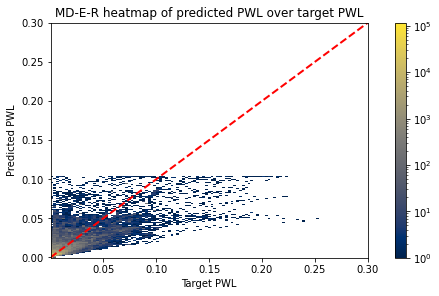

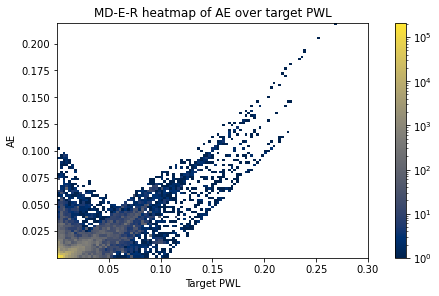

In [11]:
save_file = False
cmap = 'cividis'
bins = 100

print(model2)
test_loss_detailed_2 = xr.open_dataarray(os.path.join(results_path_2, 'test_loss_detailed_all.nc'))
x_var = 'pwl_y'
y_var = 'pwl_pred'
y_data = test_loss_detailed_2.sel(edge_feature=y_var, epoch=199).values.flatten()
y_data = y_data[~np.isnan(y_data)]
x_data = test_loss_detailed_2.sel(edge_feature=x_var, epoch=199).values.flatten()
x_data = x_data[~np.isnan(x_data)]

plt.figure(layout='constrained')
plt.hist2d(x_data, y_data, norm=mpl.colors.LogNorm(), bins=bins, cmap=plt.get_cmap(cmap))
plt.plot([0, 1], [0, 1], '--', lw=2, c='r')
plt.axis([None, pwlymax, None, pwlymax])
plt.xlabel('Target PWL')
plt.ylabel('Predicted PWL')
plt.colorbar()
title = f'{model2} heatmap of predicted PWL over target PWL'
plt.title(title)
if (save_file):
    plt.savefig(os.path.join(figures_path_2, f'HM-PWLP.pdf'), format='pdf')
    #plt.savefig(os.path.join(figures_path_2, f'{title}.png'), format='png')
# ================================
x_var = 'pwl_y'
y_var = 'loss_mae'
y_data = test_loss_detailed_2.sel(edge_feature=y_var, epoch=199).values.flatten()
y_data = y_data[~np.isnan(y_data)]
x_data = test_loss_detailed_2.sel(edge_feature=x_var, epoch=199).values.flatten()
x_data = x_data[~np.isnan(x_data)]

plt.figure(layout='constrained')
plt.hist2d(x_data, y_data, norm=mpl.colors.LogNorm(), bins=bins, cmap=plt.get_cmap(cmap))
plt.axis([None, pwlymax, None, aemax])
plt.xlabel('Target PWL')
plt.ylabel('AE')
plt.colorbar()
title = f'{model2} heatmap of AE over target PWL'
plt.title(title)
if (save_file):
    plt.savefig(os.path.join(figures_path_2, f'HM-AE.pdf'), format='pdf')
    #plt.savefig(os.path.join(figures_path_2, f'{title}.png'), format='png')

DETAILED STATS

In [12]:
test_loss_detailed_1.edge_feature

<xarray.DataArray 'edge_feature' (edge_feature: 7)>
array(['pwl_y', 'pwl_pred', 'loss_mae', 'loss_mse', 'loss_prct', 'c_dist',
       'n_dist'], dtype=object)
Coordinates:
  * edge_feature  (edge_feature) object 'pwl_y' 'pwl_pred' ... 'c_dist' 'n_dist'

In [13]:
test_loss_detailed_1 = xr.open_dataarray(os.path.join(results_path_1, 'test_loss_detailed_all.nc'))
pwl_y = test_loss_detailed_1.sel(edge_feature='pwl_y', epoch=199).values.flatten()
pwl_y = pwl_y[~np.isnan(pwl_y)]
pwl_pred = test_loss_detailed_1.sel(edge_feature='pwl_pred', epoch=199).values.flatten()
pwl_pred = pwl_pred[~np.isnan(pwl_pred)]
r2_model1 = r2_score(pwl_y, pwl_pred)
print(r2_model1)

0.36589171161284895


In [14]:
test_loss_detailed_2 = xr.open_dataarray(os.path.join(results_path_2, 'test_loss_detailed_all.nc'))
pwl_y = test_loss_detailed_2.sel(edge_feature='pwl_y', epoch=199).values.flatten()
pwl_y = pwl_y[~np.isnan(pwl_y)]
pwl_pred = test_loss_detailed_2.sel(edge_feature='pwl_pred', epoch=199).values.flatten()
pwl_pred = pwl_pred[~np.isnan(pwl_pred)]
r2_model2 = r2_score(pwl_y, pwl_pred)
print(r2_model2)

0.6001707567001363


MD-E-C


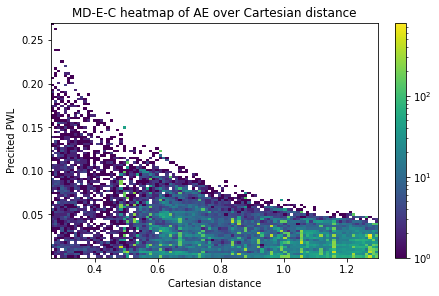

In [15]:
save_file = False
cmap = 'viridis'
bins = 100

print(model1)
test_loss_detailed_1 = xr.open_dataarray(os.path.join(results_path_1, 'test_loss_detailed_all.nc'))
x_var = 'c_dist'
y_var = 'pwl_y'
y_data = test_loss_detailed_1.sel(edge_feature=y_var, epoch=199).values.flatten()
y_data = y_data[~np.isnan(y_data)]
x_data = test_loss_detailed_1.sel(edge_feature=x_var, epoch=199).values.flatten()
x_data = x_data[~np.isnan(x_data)]


pwl_data = test_loss_detailed_1.sel(edge_feature='pwl_y', epoch=199).values.flatten()
pwl_data = pwl_data[~np.isnan(pwl_data)]
cart_dist_data = test_loss_detailed_1.sel(edge_feature='c_dist', epoch=199).values.flatten()
cart_dist_data = cart_dist_data[~np.isnan(cart_dist_data)]
loss_mae_data = test_loss_detailed_1.sel(edge_feature='loss_mae', epoch=199).values.flatten()
loss_mae_data = loss_mae_data[~np.isnan(loss_mae_data)]

#filter_min = 0.
#filter_max = 1.
#y_data = f_filter_arr(y_data, pwl_data, filter_min, filter_max)
#x_data = f_filter_arr(x_data, pwl_data, filter_min, filter_max)


hist2d_figure = True
if (hist2d_figure):
    plt.figure(layout='constrained')
    plt.hist2d(x_data, y_data, norm=mpl.colors.LogNorm(), bins=bins, cmap=plt.get_cmap(cmap))
    #plt.plot([0, 1], [0, 1], '--', lw=2, c='r')
    #plt.axis([None, pwlymax, None, pwlymax])
    #plt.axis([None, None, None, aemax])
    plt.axis([None, None, None, None])
    plt.colorbar()
    xlabel='Cartesian distance'
    ylabel='Precited PWL'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    title = f'{model1} heatmap of AE over Cartesian distance'
    plt.title(title)
else:
    plt.hist(y_data, bins=bins)#, weights=np.ones(len(y_data)) / len(y_data))
    plt.axis([None, pwlymax, None, aemax])
    xlabel='TODO'
    ylabel='TODO'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    title = f'{model1} TODO - filtered [)'
    plt.title(title)
if (save_file):
    plt.savefig(os.path.join(figures_path_1, f'TODO.pdf'), format='pdf')

MD-E-R


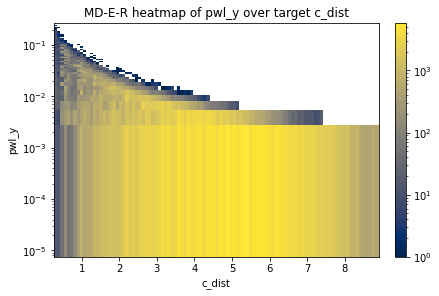

In [20]:
save_file = False
cmap = 'cividis'
bins = 100

print(model2)
test_loss_detailed_2 = xr.open_dataarray(os.path.join(results_path_2, 'test_loss_detailed_all.nc'))
x_var = 'c_dist'
y_var = 'pwl_y'
y_data = test_loss_detailed_2.sel(edge_feature=y_var, epoch=199).values.flatten()
y_data = y_data[~np.isnan(y_data)]
x_data = test_loss_detailed_2.sel(edge_feature=x_var, epoch=199).values.flatten()
x_data = x_data[~np.isnan(x_data)]


pwl_data = test_loss_detailed_2.sel(edge_feature='pwl_y', epoch=199).values.flatten()
pwl_data = pwl_data[~np.isnan(pwl_data)]
cart_dist_data = test_loss_detailed_2.sel(edge_feature='c_dist', epoch=199).values.flatten()
cart_dist_data = cart_dist_data[~np.isnan(cart_dist_data)]
loss_mae_data = test_loss_detailed_2.sel(edge_feature='loss_mae', epoch=199).values.flatten()
loss_mae_data = loss_mae_data[~np.isnan(loss_mae_data)]

#filter_min = 1.301
#filter_max = 99
#y_data = f_filter_arr(y_data, cart_dist_data, filter_min, filter_max)
#x_data = f_filter_arr(x_data, cart_dist_data, filter_min, filter_max)


hist2d_figure = True
if (hist2d_figure):
    plt.figure(layout='constrained')
    plt.hist2d(x_data, y_data, norm=mpl.colors.LogNorm(), bins=bins, cmap=plt.get_cmap(cmap))
    #plt.plot([1.3, 1.3], [0, 1], '--', lw=2, c='r')
    #plt.plot([0, 1], [0, 1], '--', lw=2, c='r')
    plt.axis([None, None, None, None])
    #plt.axis([None, None, None, aemax])
    plt.colorbar()
    ylabel='pwl_y'
    xlabel='c_dist'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yscale('log')
    title = f'{model2} heatmap of pwl_y over target c_dist'
    plt.title(title)
else:
    plt.hist(y_data, bins=bins)#, weights=np.ones(len(y_data)) / len(y_data))
    plt.axis([None, None, None, None])
    xlabel='TODO'
    ylabel='TODO'
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    title = f'{model2} TODO'
    plt.title(title)
if (save_file):
    plt.savefig(os.path.join(figures_path_2, f'HM-PWLP-CDIST-higherC.pdf'), format='pdf')